# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>


# PREDICTING STUDENT SCORE BASED ON STUDY HOURS


#### By Lavender Echessa

#### predict percentage of students based on number of hours. what will be predicted score if student studies 9.25hrs/day.

### 1.  Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading data from remote link

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Data Understanding

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
len(data)

25

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4. Exploring and Analyzing Data

#### Hours Vs Scores

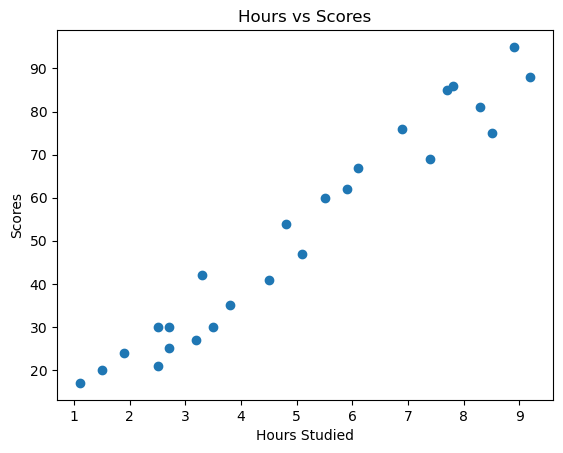

In [9]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

The scatter plot illustrates a positive linear relationship between the number of hours studied and the scores achieved. As the number of hours increases, there is a general trend of scores also increasing.

### 5. Prepare the data for training

In [10]:
# Prepare the data for training
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#### X array

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

#### y array

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### 6. Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [16]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [17]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### 7.  Training the Simple Linear Regression Model on the Training set

In [18]:
# Training the Simple Linear Regression Model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 8. Make predictions on the test set

In [19]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.88 20.  ]
 [33.73 27.  ]
 [75.36 69.  ]
 [26.79 30.  ]
 [60.49 62.  ]]


### 8. Visualising the Training set results

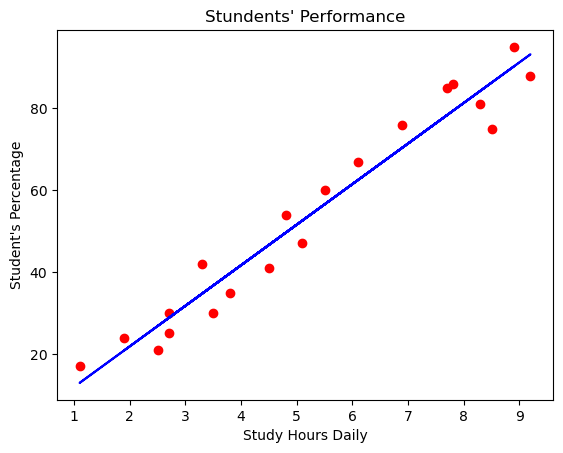

In [20]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Stundents' Performance")
plt.xlabel('Study Hours Daily')
plt.ylabel("Student's Percentage")
plt.show()

The red dots represent actual scores, while the blue line represents the predictions made by the model. The close alignment between the actual data points and the regression line confirms the model's effectiveness.

### 9. Visualising the Test set results

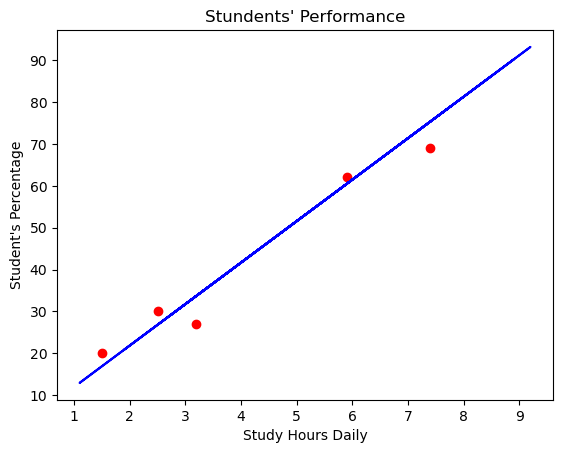

In [21]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Stundents' Performance")
plt.xlabel('Study Hours Daily')
plt.ylabel("Student's Percentage")
plt.show()

The red dots represent actual scores, while the blue line represents the predictions made by the model. The close alignment between the actual data points and the regression line confirms the model's effectiveness.

### 10. Evaluate the model

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 21.598769307217406
R-squared: 0.9454906892105355


The model predicts students' scores on the test set with good accuracy, as demonstrated by the low Mean Squared Error (MSE) of approximately 21.60 and a high R-squared value of 0.95. 

### 11. Predict the score for a student who studies 9.25 hours/day

In [23]:
# Predict the score for a student who studies 9.25 hours/day
hours_to_predict = np.array([[9.25]])
predicted_score = regressor.predict(hours_to_predict)

print(f'The predicted score for a student who studies 9.25 hours/day is approximately {predicted_score[0]:.2f}.')

The predicted score for a student who studies 9.25 hours/day is approximately 93.69.


The linear regression model predicts a high score of  93.69 for a student studying 9.25 hours per day, reflecting the positive correlation observed in the dataset.

## THANK YOU